<a href="https://colab.research.google.com/github/davo12312/FIT3164-DataProjectGroup2/blob/flask-test/Copy_of_Feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# importing cv2 
import cv2

from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Python program to explain cv2.imread() method

# importing cv2
import cv2

# path
path = r'C:\Users\eskan\Documents\2021,sem2\FIT3164\Final Dataset\train\MSS\blk-AAAAQRMDNIHL-TCGA-BR-8291-01Z-00-DX1.png'

# Using cv2.imread() method
img = cv2.imread(path)

# Displaying the image
cv2.imshow('image', img)


In [ ]:
import pathlib

In [ ]:
data_dir = 'C:\\Users\\eskan\\Documents\\2021,sem2\\FIT3164\\Final Dataset\\train'

In [ ]:
test_dir = 'C:\\Users\\eskan\\Documents\\2021,sem2\\FIT3164\\Final Dataset\\test'

In [ ]:
data_dir = pathlib.Path(data_dir)

In [ ]:
test_dir = pathlib.Path(test_dir)

In [ ]:
data_dir

WindowsPath('C:/Users/eskan/Documents/2021,sem2/FIT3164/Final Dataset/train')

In [ ]:
test_dir

WindowsPath('C:/Users/eskan/Documents/2021,sem2/FIT3164/Final Dataset/test')

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

14000


In [ ]:
image_count = len(list(test_dir.glob('*/*.png')))
print(image_count)

6000


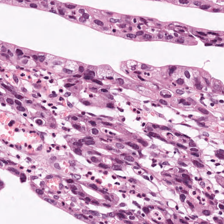

In [ ]:
MSS = list(data_dir.glob('MSS/*'))
PIL.Image.open(str(MSS[0]))

In [ ]:
batch_size = 32
img_height = 240
img_width = 240

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14000 files belonging to 2 classes.
Using 11200 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14000 files belonging to 2 classes.
Using 2800 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['MSIMUT', 'MSS']


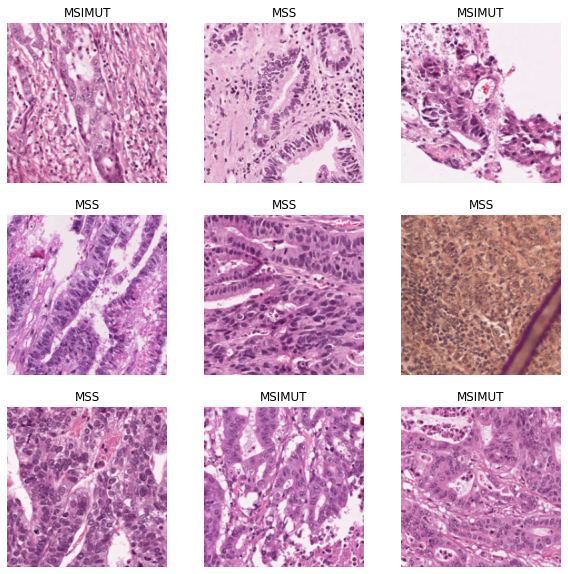

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 240, 240, 3)
(32,)


In [ ]:
import time

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.05435293 0.99784327


In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 64)       

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
350/350 [==============================] - 368s 1s/step - loss: 0.6996 - accuracy: 0.5140 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 2/10
350/350 [==============================] - 370s 1s/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6918 - val_accuracy: 0.5375
Epoch 3/10
350/350 [==============================] - 346s 989ms/step - loss: 0.6908 - accuracy: 0.5353 - val_loss: 0.6969 - val_accuracy: 0.4986
Epoch 4/10
350/350 [==============================] - 349s 998ms/step - loss: 0.6860 - accuracy: 0.5467 - val_loss: 0.6911 - val_accuracy: 0.5318
Epoch 5/10
350/350 [==============================] - 361s 1s/step - loss: 0.6642 - accuracy: 0.5940 - val_loss: 0.6773 - val_accuracy: 0.5836
Epoch 6/10
350/350 [==============================] - 353s 1s/step - loss: 0.6361 - accuracy: 0.6321 - val_loss: 0.7013 - val_accuracy: 0.5850
Epoch 7/10
350/350 [==============================] - 369s 1s/step - loss: 0.6022 - accuracy: 0.6671 - val_loss: 0.7364 - val_accuracy: 

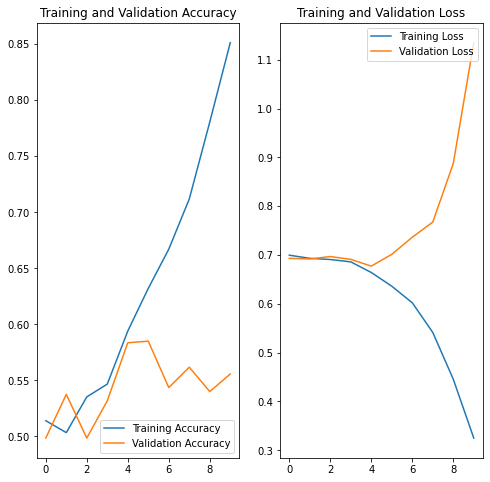

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Dropout

num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_9 (Rescaling)      (None, 240, 240, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 240, 240, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 120, 120, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 120, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 30, 30, 64)       

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
350/350 [==============================] - 319s 912ms/step - loss: 0.7181 - accuracy: 0.5051 - val_loss: 0.6929 - val_accuracy: 0.5357
Epoch 2/15
350/350 [==============================] - 293s 836ms/step - loss: 0.6930 - accuracy: 0.5052 - val_loss: 0.6926 - val_accuracy: 0.5157
Epoch 3/15
350/350 [==============================] - 282s 807ms/step - loss: 0.6930 - accuracy: 0.5083 - val_loss: 0.6927 - val_accuracy: 0.5511
Epoch 4/15
350/350 [==============================] - 282s 805ms/step - loss: 0.6929 - accuracy: 0.5166 - val_loss: 0.6918 - val_accuracy: 0.5264
Epoch 5/15
350/350 [==============================] - 288s 823ms/step - loss: 0.6928 - accuracy: 0.5159 - val_loss: 0.6918 - val_accuracy: 0.5343
Epoch 6/15
350/350 [==============================] - 284s 812ms/step - loss: 0.6913 - accuracy: 0.5270 - val_loss: 0.6902 - val_accuracy: 0.5393
Epoch 7/15
350/350 [==============================] - 282s 805ms/step - loss: 0.6868 - accuracy: 0.5420 - val_loss: 0.6804 -

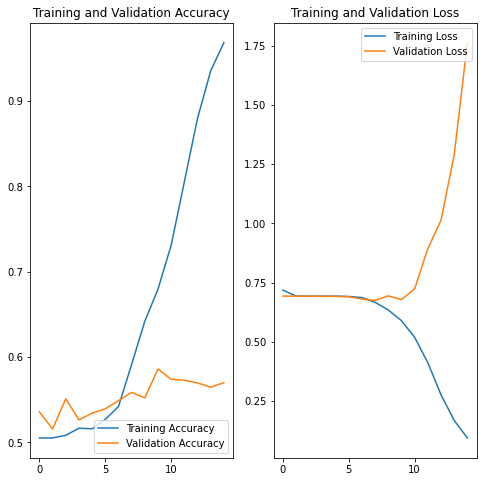

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# inception

